In [2]:
%matplotlib inline
import numpy as np
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

priority, window, num_nodes, ave_sum_stay_t, se_sum_stay_t, ave_sum_task_t, se_sum_task_t, ave_var_task_t, se_var_task_t = np.loadtxt("./data/exp/data_true", delimiter=',', unpack=True)
priority_f, window_f, num_nodes_f, ave_sum_stay_f, se_sum_stay_f, ave_sum_task_f, se_sum_task_f, ave_var_task_f, se_var_task_f = np.loadtxt("./data/exp/data_false", delimiter=',', unpack=True)
priority_g, window_g, num_nodes_g, ave_sum_stay_g, se_sum_stay_g, ave_sum_task_g, se_sum_task_g, ave_var_task_g, se_var_task_g = np.loadtxt("./data/exp/data_ghost", delimiter=',', unpack=True)
# print(window)
# print(num_nodes)
print(ave_sum_task_t)
# print(se_sum_task_t)
print(num_nodes_g)
print(ave_sum_task_g)

[ 61.96  85.14  84.86  70.16  50.92  28.25  10.18  61.12  82.62 103.54
  98.14  84.19  55.33  27.33  61.54  99.67 112.62  93.12  70.68  35.05
  14.94  61.11  96.73 109.77  89.82  64.53  29.84  10.76  62.07  97.29
 107.67  87.42  63.02  29.33  10.25]
[ 1.  2.  4.  5.  6.  8. 12.]
[ 62.14 124.19 248.73 310.43 371.29 498.17 744.18]


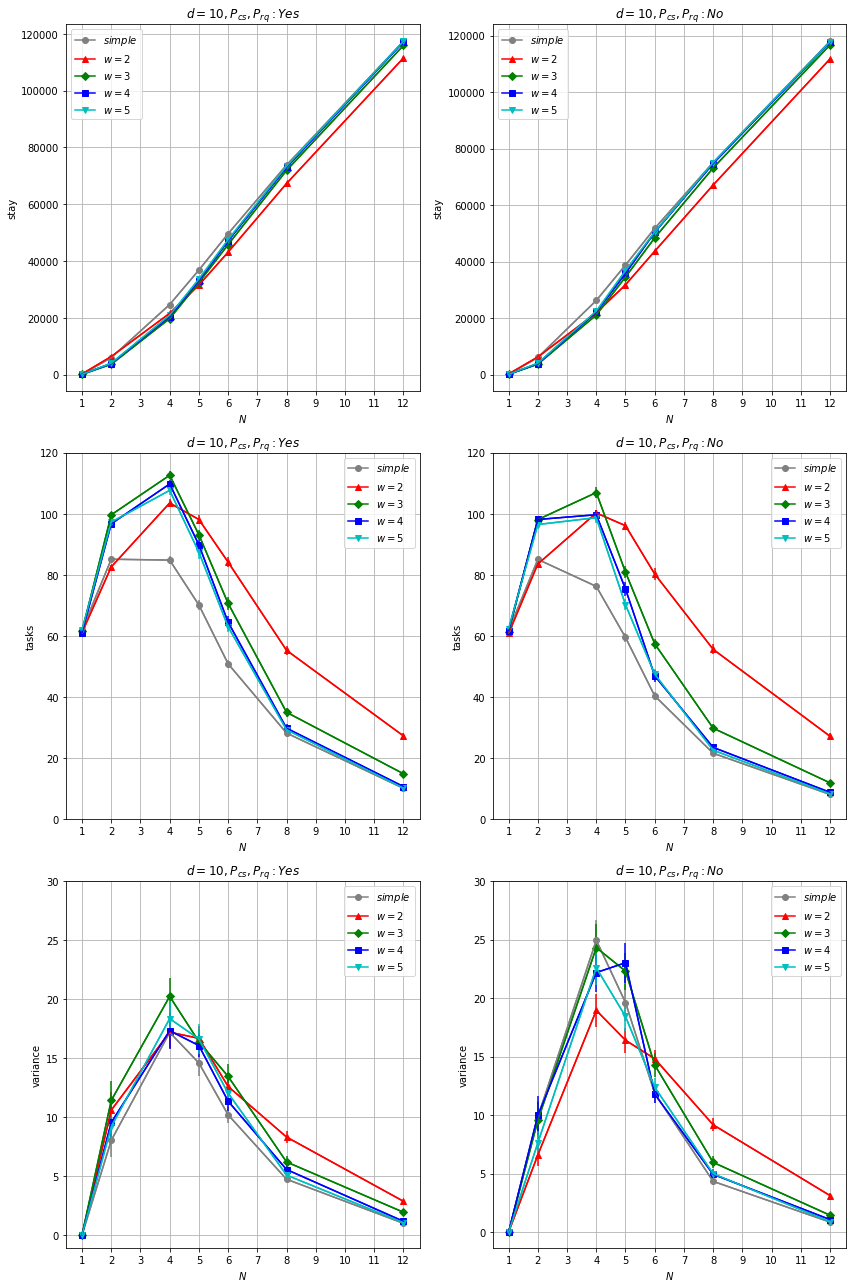

In [112]:
MAX_NUM_NODES = 12
NUM_TYPE_NUM_NODES = 7 # 1, 2, 4, 5, 6, 8, 12 -> 7 types
WINDOW_SIZES = ['$simple$', '$w=2$', '$w=3$', '$w=4$', '$w=5$'] # redefined below
NUM_WINDOW_SIZE = 5 # redefined below

COLORS = ["grey", "r", "g", "b", "c", "m", "y", "k", "w"]
MARKERS = ['o', '^', 'D', 's', 'v', '*']

plt.figure(figsize=(12, 18))

def data_plot(xdata, ydata, errdata, title, ylabel, xlabel='$N$', num_window_size=NUM_WINDOW_SIZE, window_sizes=WINDOW_SIZES, num_type_num_nodes=NUM_TYPE_NUM_NODES, max_num_nodes=MAX_NUM_NODES):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(num_window_size):
        x = xdata[num_type_num_nodes*i:num_type_num_nodes*(i+1)]
        y = ydata[num_type_num_nodes*i:num_type_num_nodes*(i+1)]
        err = errdata[num_type_num_nodes*i:num_type_num_nodes*(i+1)]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i], label=window_sizes[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(1, max_num_nodes+1, 1.0))
    plt.grid()
    plt.legend()

plt.subplot(3, 2, 1)
data_plot(num_nodes, ave_sum_stay_t, se_sum_stay_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'stay')

plt.subplot(3, 2, 2)
data_plot(num_nodes, ave_sum_stay_f, se_sum_stay_f, '$d=10, P_{cs}, P_{rq}: No$',  'stay')

plt.subplot(3, 2, 3)
data_plot(num_nodes, ave_sum_task_t, se_sum_task_t, '$d=10, P_{cs}, P_{rq}: Yes$', 'tasks')
plt.yticks(np.arange(0, 121, 20))

plt.subplot(3, 2, 4)
data_plot(num_nodes, ave_sum_task_f, se_sum_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'tasks')
plt.yticks(np.arange(0, 121, 20))

plt.subplot(3, 2, 5)
data_plot(num_nodes, ave_var_task_t, se_var_task_t, '$d=10, P_{cs}, P_{rq}: Yes$',  'variance')
plt.yticks(np.arange(0, 31, 5))

plt.subplot(3, 2, 6)
data_plot(num_nodes, ave_var_task_f, se_var_task_f, '$d=10, P_{cs}, P_{rq}: No$',  'variance')
plt.yticks(np.arange(0, 31, 5))

plt.tight_layout()
plt.savefig('./fig/graphs-wn.png')

[0.9971033150949469, 0.6855624446412755, 0.34117315965102724, 0.2260090841735657, 0.137143472757144, 0.056707549631651845, 0.013679486145824935, 0.9835854522046991, 0.6652709557935422, 0.416274675350782, 0.3161421254389073, 0.22674997980015618, 0.11106650340245297, 0.03672498589051036, 0.9903443836498229, 0.8025605926403092, 0.45278012302496684, 0.2999710079567052, 0.19036332785693125, 0.0703575084810406, 0.020075788115778443, 0.9834245252655295, 0.7788871889846204, 0.44132191532987575, 0.2893405920819508, 0.17379945595087398, 0.05989923118614127, 0.014458867478298262, 0.9988735114258127, 0.7833964087285611, 0.43287902544928236, 0.28160938053667495, 0.16973255406824853, 0.05887548427243711, 0.013773549410088957]


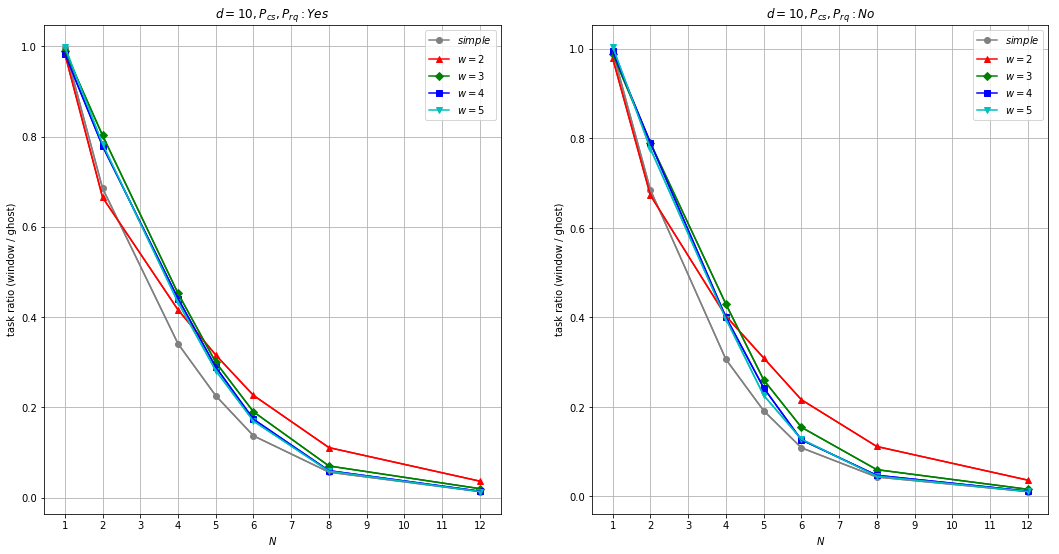

In [114]:
ratio_t = []
ratio_f= []
for i in range(NUM_WINDOW_SIZE):
    for j in range(NUM_TYPE_NUM_NODES):
        window_task_t = ave_sum_task_t[NUM_TYPE_NUM_NODES*i+j]
        window_task_f = ave_sum_task_f[NUM_TYPE_NUM_NODES*i+j]
        ghost_task = ave_sum_task_g[j]
        ratio_t.append(window_task_t/ghost_task)
        ratio_f.append(window_task_f/ghost_task)

plt.figure(figsize=(18, 9))
print(ratio_t)
dummy_se = np.zeros(35)
plt.subplot(1, 2, 1)
data_plot(num_nodes, ratio_t, dummy_se, '$d=10, P_{cs}, P_{rq}: Yes$', 'task ratio (window / ghost)')
plt.subplot(1, 2, 2)
data_plot(num_nodes, ratio_f, dummy_se, '$d=10, P_{cs}, P_{rq}: No$', 'task ratio (window / ghost)')
plt.savefig('./fig/graphs-ghost.png')

[2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5.
 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4.
 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3.
 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 2.
 3. 4. 5. 6.]
[21404.14 20029.11 20256.91 20969.96 20956.44 21545.31 19699.79 20408.07
 20854.95 21068.49 22368.28 19838.88 20175.03 20241.85 20302.62 21452.06
 20013.63 20281.45 21013.73 20653.53 26025.95 23059.99 23571.22 23183.08
 23738.61 27065.7  24688.15 24786.17 24921.75 24758.36 28307.09 25514.02
 25816.24 26231.39 25816.29 28910.93 26473.28 26251.34 26534.75 26691.97
 29420.48 27731.59 27139.02 27176.89 27416.67 30182.46 28460.34 28217.48
 28933.67 28251.17 30812.64 28895.09 28626.57 29013.31 29002.63 31323.51
 29610.83 29385.26 29669.86 29794.55 31793.44 30452.96 30187.92 30397.08
 30647.68 32262.17 30555.13 30393.62 30838.87 30513.51 32831.98 31200.31
 30605.27 31161.51 31060.87 33122.54 

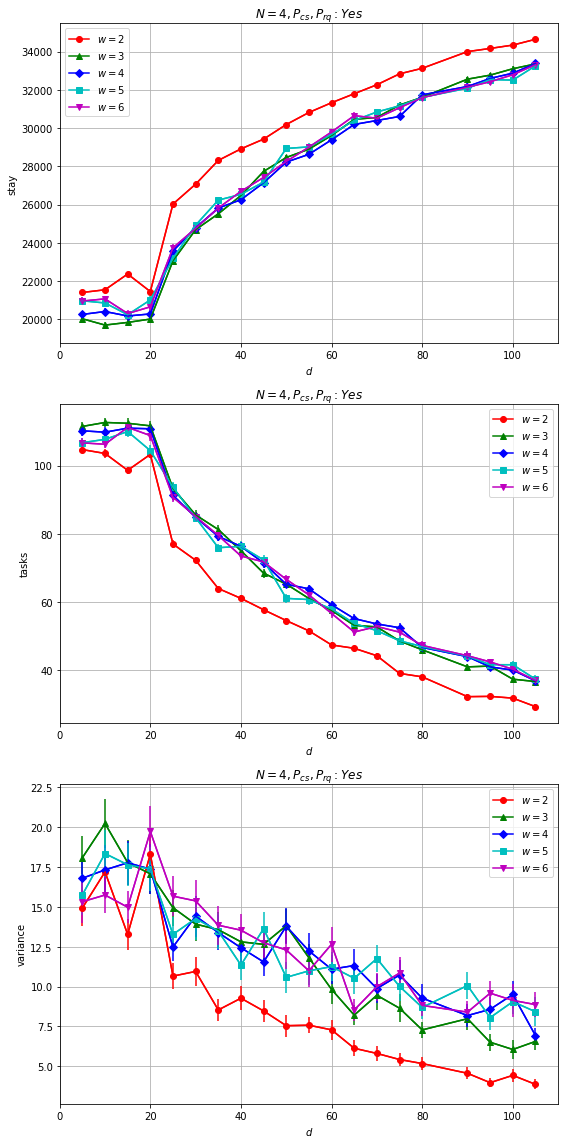

In [139]:
WINDOW_SIZES = ['2', '3', '4', '5', '6'] # redefined
NUM_WINDOW_SIZE = 5 # redefined
MAX_WINDOW_SIZE = 6
NUM_TYPE_DELAYS = 20 # 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 95, 100, 105
DELAYS = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 95, 100, 105]
MAX_DELAY = 105
priority_d, window_d, num_nodes_d, ave_sum_stay_d, se_sum_stay_d, ave_sum_task_d, se_sum_task_d, ave_var_task_d, se_var_task_d = np.loadtxt("./data/delay/data_summary", delimiter=',', unpack=True)
# priority_d, window_d, num_nodes_d, ave_sum_stay_d, se_sum_stay_d, ave_sum_task_d, se_sum_task_d, ave_var_task_d, se_var_task_d = np.loadtxt("./data/delay/data_summary_with_details", delimiter=',', unpack=True)
print(window_d)
print(ave_sum_stay_d)
print(ave_sum_task_d)

def parse_wx_to_dx(data, num_window_size=NUM_WINDOW_SIZE, num_type_delays=NUM_TYPE_DELAYS):
    parsed = [[] for i in range(num_window_size)]
    for i in range(num_type_delays):
        for j in range(num_window_size):
            parsed[j].append(data[num_window_size*i+j])
    return parsed

print(parse_wx_to_dx(ave_sum_stay_d))

def data_plot_d(xdata, ydata, errdata, title, ylabel, xlabel='$d$', num_window_size=NUM_WINDOW_SIZE, window_sizes=WINDOW_SIZES):
    """
    Plot graph with xdata and ydata.
    The second param errdata represents yerror.
    """
    for i in range(num_window_size):
        x = xdata
        y = ydata[i]
        err = errdata[i]
        plt.errorbar(x, y, yerr=err, fmt=COLORS[i+1])
        plt.plot(x, y, marker=MARKERS[i], color=COLORS[i+1], label='$w=$'+window_sizes[i])
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.legend()
    
plt.figure(figsize=(8, 16))
plt.subplot(3, 1, 1)
data_plot_d(DELAYS, parse_wx_to_dx(ave_sum_stay_d), parse_wx_to_dx(se_sum_stay_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'stay')
plt.subplot(3, 1, 2)
data_plot_d(DELAYS, parse_wx_to_dx(ave_sum_task_d), parse_wx_to_dx(se_sum_task_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'tasks')
plt.subplot(3, 1, 3)
data_plot_d(DELAYS, parse_wx_to_dx(ave_var_task_d), parse_wx_to_dx(se_var_task_d), '$N = 4, P_{cs}, P_{rq}: Yes$', 'variance')
plt.tight_layout()
plt.savefig('./fig/graphs-wd.png')


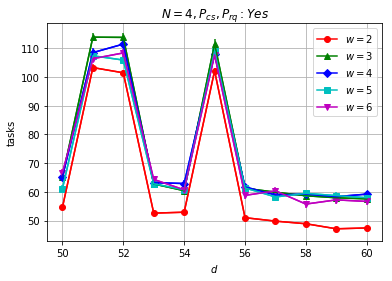

In [119]:
DELAYS_AROUND_55 = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] # n=11
priority_d_55, window_d_55, num_nodes_d_55, ave_sum_stay_d_55, se_sum_stay_d_55, ave_sum_task_d_55, se_sum_task_d_55, ave_var_task_d_55, se_var_task_d_55 = np.loadtxt("./data/delay/data_summary_around_55", delimiter=',', unpack=True)
data_plot_d(DELAYS_AROUND_55, parse_wx_to_dx(ave_sum_task_d_55, num_type_delays=11), parse_wx_to_dx(se_sum_task_d_55, num_type_delays=11), '$N = 4, P_{cs}, P_{rq}: Yes$', 'tasks')

[[104.67, 111.46, 110.18, 106.7, 106.64], [103.54, 112.62, 109.77, 107.67, 106.24], [98.6, 112.39, 110.95, 109.97, 111.18], [103.26, 111.63, 110.77, 104.37, 108.79], [77.0, 93.29, 91.26, 93.66, 90.72], [72.25, 85.53, 84.83, 84.73, 85.05], [63.97, 81.25, 79.24, 75.93, 79.51], [61.08, 75.06, 76.32, 76.33, 73.5], [57.75, 68.47, 71.45, 72.35, 71.75], [54.58, 65.26, 65.22, 61.08, 66.65], [51.56, 61.05, 63.88, 60.73, 62.1], [47.43, 57.57, 59.22, 57.96, 56.67], [46.45, 53.16, 55.15, 53.75, 51.22], [44.27, 52.72, 53.58, 51.6, 52.84], [39.09, 48.6, 52.48, 48.66, 51.18], [38.09, 46.01, 46.71, 46.95, 47.3], [32.28, 41.01, 44.0, 44.14, 44.27], [32.36, 41.24, 41.0, 41.64, 42.46], [31.85, 37.4, 40.05, 41.64, 40.31], [29.36, 36.71, 36.92, 37.42, 37.02]]
[[21404.14, 20029.11, 20256.91, 20969.96, 20956.44], [21545.31, 19699.79, 20408.07, 20854.95, 21068.49], [22368.28, 19838.88, 20175.03, 20241.85, 20302.62], [21452.06, 20013.63, 20281.45, 21013.73, 20653.53], [26025.95, 23059.99, 23571.22, 23183.08, 2

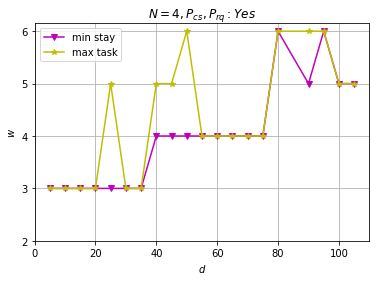

In [125]:
# choose the best w for each d, and plot them as a function of d

def parse_by_w(data, num_type_delays=NUM_TYPE_DELAYS, num_window_size=NUM_WINDOW_SIZE):
    parsed = [[] for i in range(num_type_delays)]
    for i in range(num_type_delays):
        for j in range(num_window_size):
            parsed[i].append(data[num_window_size*i+j])
    return parsed

sum_stay_d_by_w = parse_by_w(ave_sum_stay_d)
sum_task_d_by_w = parse_by_w(ave_sum_task_d)
print(sum_task_d_by_w)
print(sum_stay_d_by_w)
min_sum_stay_index = np.argmin(sum_stay_d_by_w, axis=1)
max_sum_task_index = np.argmax(sum_task_d_by_w, axis=1)
print(min_sum_stay_index)
print(max_sum_task_index)
plt.plot(DELAYS, min_sum_stay_index+2, marker=MARKERS[i], color=COLORS[i+1], label='min stay')
plt.plot(DELAYS, max_sum_task_index+2, marker=MARKERS[i+1], color=COLORS[i+2], label='max task')
plt.title('$N=4, P_{cs}, P_{rq}: Yes$')
plt.yticks(np.arange(2, MAX_WINDOW_SIZE+1, 1))
plt.xlabel('$d$')
plt.ylabel('$w$')
plt.grid()
plt.legend()

[[27953.82, 30383.25, 31855.28, 32940.66], [27224.97, 28801.94, 30260.71, 31494.77], [27275.91, 28499.48, 30211.33, 31472.01], [27696.56, 28877.54, 30249.44, 31513.31], [27457.7, 28784.43, 30202.7, 31432.69]]


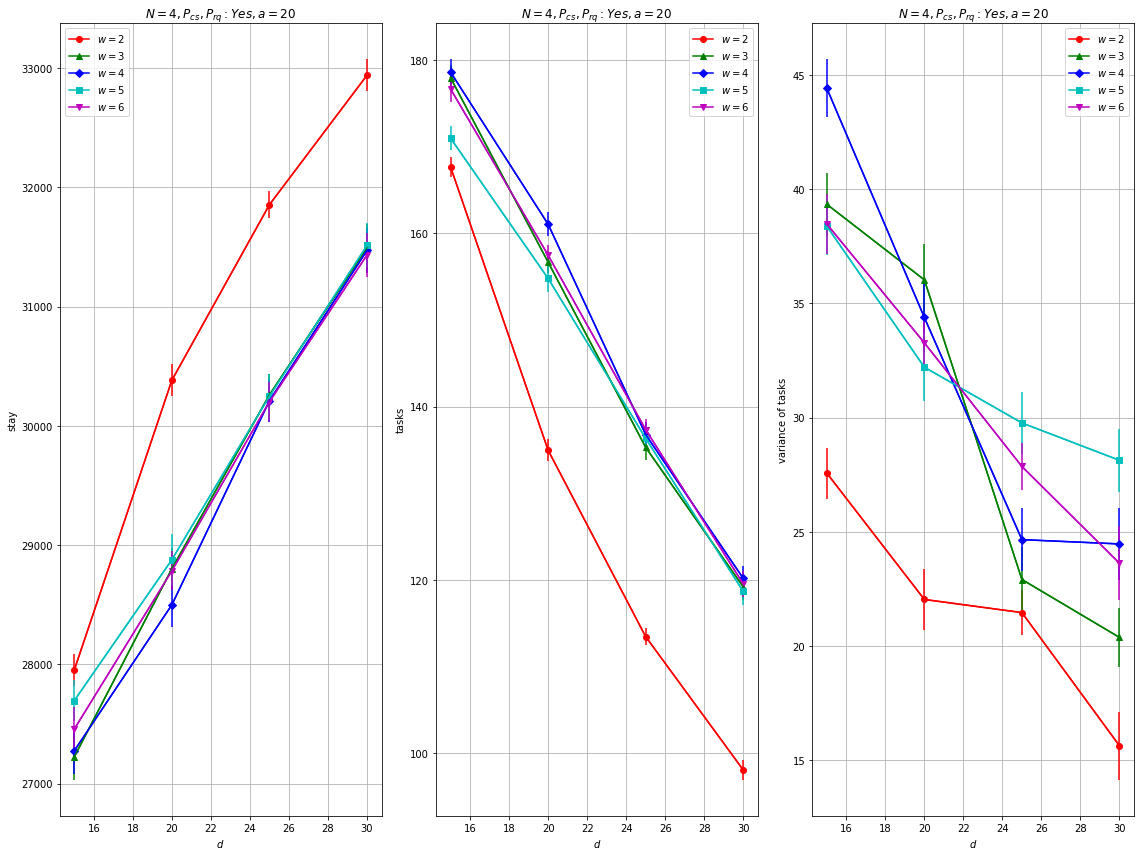

In [121]:
priority_d_20, window_d_20, num_nodes_d_20, ave_sum_stay_d_20, se_sum_stay_d_20, ave_sum_task_d_20, se_sum_task_d_20, ave_var_task_d_20, se_var_task_d_20 = np.loadtxt("./data/delay/a_20/data_summary", delimiter=',', unpack=True)
print(parse_wx_to_dx(ave_sum_stay_d_20, num_type_delays=4))

plt.figure(figsize=(16, 12))
plt.subplot(1, 3, 1)
data_plot_d([15, 20, 25, 30], parse_wx_to_dx(ave_sum_stay_d_20, num_type_delays=4), parse_wx_to_dx(se_sum_stay_d, num_type_delays=4), '$N = 4, P_{cs}, P_{rq}: Yes, a=20$', 'stay')
plt.subplot(1, 3, 2)
data_plot_d([15, 20, 25, 30], parse_wx_to_dx(ave_sum_task_d_20, num_type_delays=4), parse_wx_to_dx(se_sum_task_d, num_type_delays=4), '$N = 4, P_{cs}, P_{rq}: Yes, a=20$', 'tasks')
plt.subplot(1, 3, 3)
data_plot_d([15, 20, 25, 30], parse_wx_to_dx(ave_var_task_d_20, num_type_delays=4), parse_wx_to_dx(se_var_task_d, num_type_delays=4), '$N = 4, P_{cs}, P_{rq}: Yes, a=20$', 'variance of tasks')
plt.tight_layout()

[[[18912.0, 22075.0, 20271.0, 19517.0, 23448.0], [20279.0, 18116.0, 17926.0, 22822.0, 20397.0], [21809.0, 19493.0, 18239.0, 18242.0, 22292.0], [23447.0, 20420.0, 17297.0, 21283.0, 22836.0], [21097.0, 19512.0, 24081.0, 20865.0, 20183.0], [20715.0, 18951.0, 20747.0, 20466.0, 20463.0], [20976.0, 20400.0, 17873.0, 21900.0, 17566.0], [21402.0, 18918.0, 17510.0, 19847.0, 21349.0], [20764.0, 20297.0, 24187.0, 21187.0, 20982.0], [20932.0, 21658.0, 22332.0, 24699.0, 19901.0], [20849.0, 22528.0, 18102.0, 19578.0, 20847.0], [21347.0, 23569.0, 22887.0, 20050.0, 20201.0], [20061.0, 19260.0, 18440.0, 21305.0, 24310.0], [18763.0, 21138.0, 18637.0, 23336.0, 21790.0], [21318.0, 19730.0, 24898.0, 22730.0, 17931.0], [22097.0, 17813.0, 20390.0, 21617.0, 17966.0], [22000.0, 21961.0, 16669.0, 22956.0, 21959.0], [21746.0, 22354.0, 19061.0, 20325.0, 21388.0], [20953.0, 17858.0, 19856.0, 21208.0, 17697.0], [23302.0, 19680.0, 19045.0, 20216.0, 22968.0], [22149.0, 19404.0, 21373.0, 19244.0, 20903.0], [19412.0, 2

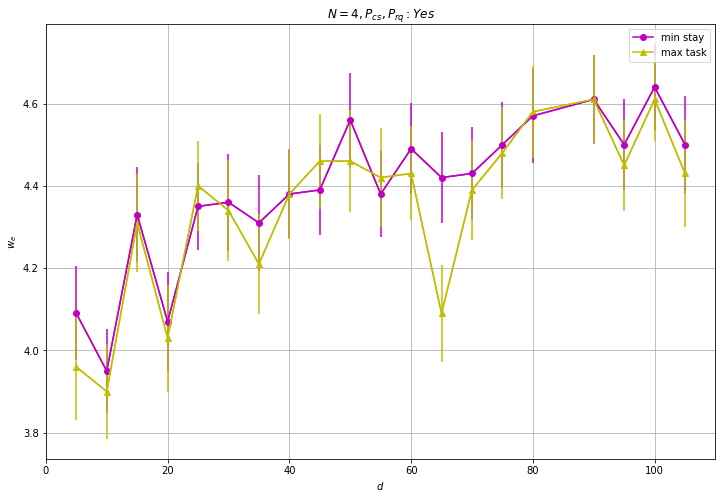

In [144]:
# get w_e s for each trial and calculate average of them

sum_stay_d,  sum_task_d, var_task_d = np.loadtxt("./data/delay/data_raw", delimiter=',', unpack=True)
NUM_TRIALS = 100
stays_d = [[[0 for i in range(NUM_WINDOW_SIZE)] for j in range(NUM_TRIALS)] for k in range(NUM_TYPE_DELAYS)]
tasks_d = [[[0 for i in range(NUM_WINDOW_SIZE)] for j in range(NUM_TRIALS)] for k in range(NUM_TYPE_DELAYS)]
for k in range(NUM_TYPE_DELAYS):
    for i in range(NUM_WINDOW_SIZE):
        for j in range(NUM_TRIALS):
            stays_d[k][j][i] = sum_stay_d[NUM_WINDOW_SIZE*NUM_TRIALS*k+NUM_TRIALS*i+j]
            tasks_d[k][j][i] = sum_task_d[NUM_WINDOW_SIZE*NUM_TRIALS*k+NUM_TRIALS*i+j]

print(stays_d)

stays_min_index = np.argmin(stays_d, axis=2)
tasks_max_index = np.argmax(tasks_d, axis=2)
print(stays_min_index)
print(tasks_max_index)

stays_min_index_ave = np.average(stays_min_index, axis=1)
stays_min_index_se = np.std(stays_min_index+2, axis=1)/np.sqrt(NUM_TRIALS)
tasks_max_index_ave = np.average(tasks_max_index, axis=1)
tasks_max_index_se = np.std(tasks_max_index+2, axis=1)/np.sqrt(NUM_TRIALS)
print(stays_min_index_ave+2)
print(tasks_max_index_ave+2)

plt.figure(figsize=(12, 8))
plt.errorbar(DELAYS, stays_min_index_ave+2, yerr=stays_min_index_se, fmt='m')
plt.plot(DELAYS, stays_min_index_ave+2, marker='o', color='m', label='min stay')
plt.errorbar(DELAYS, tasks_max_index_ave+2, yerr=tasks_max_index_se, fmt='y')
plt.plot(DELAYS, tasks_max_index_ave+2, marker='^', color='y', label='max task')
plt.title('$N=4, P_{cs}, P_{rq}: Yes$')
plt.xlabel('$d$')
plt.ylabel('$w_e$')
plt.grid()
plt.legend()
plt.savefig('./fig/graph-w-efficient.png')